## 本篇內容以分析音樂頻道為主，透過YouTube官方提供的API進行資料的撈取

### 資料分析流程

網址：https://developers.google.com/youtube/v3/docs

網站提供多種不同的程式語言及參考資料。

Week#01：資料專案的起手式 - 資料收集與問題定義

Week#02：了解資料欄位及處理

Week#03：資料清理及BI工具視覺化呈現

Week#04：聚焦特定的視覺化呈現(資料呈現)

Week#05：專案收尾與驗收


本篇以Python為主進行撰寫，其內容如下。

## 導入需要的package以利後續使用

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 設定需要的變數
需要先到此網址開啟服務(YouTube Data API v3):https://console.cloud.google.com/welcome?project=youtube-data-api-test-352306&hl=zh-tw

開啟後參考此網址，便可開始撈取數據：https://developers.google.com/youtube/v3/docs/channels/list

In [2]:
api_service_name = "youtube"
api_version = "v3"
api_key = '你的金鑰'
youtube = build('youtube', 'v3', developerKey = api_key)

## 初步設定好後可以測試，並利用以下JsonFormatter更清楚的查看頻道欄位資訊

透過回傳test_get_channel_stats這個fun，回傳response可以查到我們所設定的part的所有欄位資訊。

request使用說明(Channels)：https://developers.google.com/youtube/v3/docs/channels/list

JsonFormatter：https://jsonformatter.curiousconcept.com/#

In [3]:
channel_id = 'UCln9P4Qm3-EAY4aiEPmRwEA' # Ado
def test_get_channel_stats(youtube, channel_id):
    
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics,topicDetails,brandingSettings,contentOwnerDetails,localizations',
        id=channel_id)
    response = request.execute()
    return response

In [6]:
# test_get_channel_stats(youtube, channel_id) #由於欄位過長，故將其註解掉

## 測試並了解欄位後，也可一次查詢不同頻道的資料

In [3]:
channel_ids = ['UCln9P4Qm3-EAY4aiEPmRwEA', # Ado
               'UCvpredjG93ifbCP1Y77JyFA', # YOASOBI1
               'UCPKlrgZXnnb89nSeITvTdGA', # 星野源
               'UC2JzylaIF8qeowc7-5VwwmA', # 美波
               'UCAYrMNl92jw6cpjdpBP8JyA', # Ru's Paino Ru味春捲
               'UCI7ktPB6toqucpkkCiolwLg', # Pan Paino1
               'UCyjuFsbclXyntSRMBAILzbw', # 2CELLOS
               'UC9zY_E8mcAo_Oq772LEZq8Q', # The First Take
               'UCDbQblY1XASbgqOXmy6FOFQ'  # kobasolo
              ]

## 此正式擷取所需要的資料，並將存取的資料存成music_channel

In [4]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    requests = youtube.channels().list(
        part="snippet,contentDetails,statistics,topicDetails,brandingSettings,contentOwnerDetails,localizations",
        id = ','.join(channel_ids))
    response = requests.execute()
    
#     return response
# 若以找回到欄位再取消註解
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'], # 頻道名稱
                    Description = response['items'][i]['snippet']['description'], # 頻道介紹
                    Published = response['items'][i]['snippet']['publishedAt'], # 頻道創建日期
                    Country = response['items'][i]['snippet']['country'], # 頻道位置
                    Subscribers = response['items'][i]['statistics']['subscriberCount'], # 訂閱人數
                    Views = response['items'][i]['statistics']['viewCount'], # 總觀看人數
                    Playlist = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'], # 總上傳影片id
                    VideoCount = response['items'][i]['statistics']['videoCount'], # 頻道數量
                    Channel_topic = response['items'][i]['topicDetails']['topicCategories'], # 頻道類型
                    Image = response['items'][i]['snippet']['thumbnails']['high']['url'], # 頻道圖片
                    Keywords = '')
        if 'keywords' not in response['items'][i]['brandingSettings']['channel']:
            data['Keywords'] == ''
        else:
            data['Keywords'] = response['items'][i]['brandingSettings']['channel']['keywords']
        all_data.append(data)
    return all_data

In [5]:
music_channel = get_channel_stats(youtube, channel_ids)

## 轉成dataframe的形式方便查看

In [11]:
channel_data = pd.DataFrame(music_channel)
channel_data

,Channel_name,Description,Published,Country,Subscribers,Views,Playlist,VideoCount,Channel_topic,Image,Keywords
0,Ado,元気です。,2018-08-18T02:02:50Z,JP,3900000,1339411388,UUln9P4Qm3-EAY4aiEPmRwEA,80,[https://en.wikipedia.org/wiki/Electronic_musi...,https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEn...,"アド あぼ ado ""アド 歌い手"" ADO Ado ""Ado TikTok"" ""アド ティ..."
1,美波,【美波 Official Youtube Channel】,2016-01-03T14:58:38Z,JP,1300000,408773492,UU2JzylaIF8qeowc7-5VwwmA,7,[https://en.wikipedia.org/wiki/Independent_mus...,https://yt3.ggpht.com/ytc/AMLnZu-a_zfDCmdvUihG...,シンガーソングライター
2,kobasolo,毎週金曜19時更新!!音楽プロデューサー、ミュージシャンとして活動するコバソロが贈るエンター...,2008-06-30T15:34:30Z,JP,3000000,1415750412,UUDbQblY1XASbgqOXmy6FOFQ,499,"[https://en.wikipedia.org/wiki/Music, https://...",https://yt3.ggpht.com/ytc/AMLnZu-9S3og5Ip2zFAS...,KOBASOLO コバソロ リトルタートルズ 音楽 music インディーズ little ...
3,Ayase / YOASOBI,ボカロP・Ayase、そしてAyaseがコンポーザーを務めるユニット・YOASOBIのYou...,2018-11-16T23:11:18Z,JP,3970000,2007955926,UUvpredjG93ifbCP1Y77JyFA,109,"[https://en.wikipedia.org/wiki/Music, https://...",https://yt3.ggpht.com/ytc/AMLnZu_8o8D8yLIaOLRZ...,
4,Ru's Piano Ru味春捲,"I’m RuRu, a piano youtuber from Taiwan.\nMakin...",2018-03-14T09:38:37Z,TW,2250000,290367664,UUAYrMNl92jw6cpjdpBP8JyA,393,"[https://en.wikipedia.org/wiki/Music, https://...",https://yt3.ggpht.com/ytc/AMLnZu_-ZUJbCF-LRu25...,"鋼琴 Ru味春捲 ""Ru's Piano"" ""Ru Piano"" Piano ピアノ ""An..."
5,Pan Piano,台湾のピアニストです！ \nアニソンを弾いてます～ \n良かったら、チャンネル登録お願いしま...,2016-07-27T15:21:51Z,TW,3350000,520227536,UUI7ktPB6toqucpkkCiolwLg,541,"[https://en.wikipedia.org/wiki/Music, https://...",https://yt3.ggpht.com/ytc/AMLnZu-uZODxdm-BCEo0...,鋼琴 演奏 ACG 動畫 漫畫 piano ピアノ アニメ 弾いてみた コスプレ パンピアノ...
6,星野源,音楽家・俳優・文筆家。\n2010年に1stアルバム『ばかのうた』にてソロデビュー。2016...,2015-05-08T03:39:24Z,JP,1460000,917609111,UUPKlrgZXnnb89nSeITvTdGA,96,"[https://en.wikipedia.org/wiki/Music, https://...",https://yt3.ggpht.com/DLCVX6ArRGaHMe4k4N7Q_QtY...,"星野源 ほしのげん ホシノゲン ""Gen Hoshino"" ""Hoshino Gen"" ""星..."
7,THE FIRST TAKE,A microphone and a white studio.\n\nAnd 1 rule...,2019-11-05T11:51:17.905563Z,JP,6690000,2343182969,UU9zY_E8mcAo_Oq772LEZq8Q,417,"[https://en.wikipedia.org/wiki/Music, https://...",https://yt3.ggpht.com/ytc/AMLnZu9H0hC1Gt8ZLT4V...,
8,2CELLOS,The official home of 2CELLOS - we post our new...,2011-10-17T21:02:43Z,HR,6270000,1607694129,UUyjuFsbclXyntSRMBAILzbw,213,"[https://en.wikipedia.org/wiki/Music, https://...",https://yt3.ggpht.com/ytc/AMLnZu9V7gXnpIUCJYKK...,2CELLOS Luka Sulic Stjepan Hauser Two Cellos


## 處理Channel_Topic欄位，將其呈現頻道所設定之主題

In [12]:
def get_topic(df):
    col = []
    topic = []
    for i in df['Channel_topic']:
        if i == '':
            col.append('')
        else:
            for j in range(len(i)):
                topic.append(i[j].split('/')[4])
            col.append(topic)
            topic = []
    df['Channel_topic'] = col
    return df.head()

In [13]:
get_topic(channel_data)

,Channel_name,Description,Published,Country,Subscribers,Views,Playlist,VideoCount,Channel_topic,Image,Keywords
0,Ado,元気です。,2018-08-18T02:02:50Z,JP,3900000,1339411388,UUln9P4Qm3-EAY4aiEPmRwEA,80,"[Electronic_music, Independent_music, Music, M...",https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEn...,"アド あぼ ado ""アド 歌い手"" ADO Ado ""Ado TikTok"" ""アド ティ..."
1,美波,【美波 Official Youtube Channel】,2016-01-03T14:58:38Z,JP,1300000,408773492,UU2JzylaIF8qeowc7-5VwwmA,7,"[Independent_music, Pop_music, Music_of_Asia, ...",https://yt3.ggpht.com/ytc/AMLnZu-a_zfDCmdvUihG...,シンガーソングライター
2,kobasolo,毎週金曜19時更新!!音楽プロデューサー、ミュージシャンとして活動するコバソロが贈るエンター...,2008-06-30T15:34:30Z,JP,3000000,1415750412,UUDbQblY1XASbgqOXmy6FOFQ,499,"[Music, Music_of_Asia, Pop_music]",https://yt3.ggpht.com/ytc/AMLnZu-9S3og5Ip2zFAS...,KOBASOLO コバソロ リトルタートルズ 音楽 music インディーズ little ...
3,Ayase / YOASOBI,ボカロP・Ayase、そしてAyaseがコンポーザーを務めるユニット・YOASOBIのYou...,2018-11-16T23:11:18Z,JP,3970000,2007955926,UUvpredjG93ifbCP1Y77JyFA,109,"[Music, Music_of_Asia, Pop_music]",https://yt3.ggpht.com/ytc/AMLnZu_8o8D8yLIaOLRZ...,
4,Ru's Piano Ru味春捲,"I’m RuRu, a piano youtuber from Taiwan.\nMakin...",2018-03-14T09:38:37Z,TW,2250000,290367664,UUAYrMNl92jw6cpjdpBP8JyA,393,"[Music, Music_of_Asia, Classical_music]",https://yt3.ggpht.com/ytc/AMLnZu_-ZUJbCF-LRu25...,"鋼琴 Ru味春捲 ""Ru's Piano"" ""Ru Piano"" Piano ピアノ ""An..."


## 查看資料型態並將數值轉為數值型態

In [14]:
channel_data.dtypes

Channel_name     object
Description      object
Published        object
Country          object
Subscribers      object
Views            object
Playlist         object
VideoCount       object
Channel_topic    object
Image            object
Keywords         object
dtype: object

In [15]:
channel_data['Published'] = pd.to_datetime(channel_data['Published']).dt.date
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['VideoCount'] = pd.to_numeric(channel_data['VideoCount'])
print(channel_data.dtypes)
channel_data

Channel_name     object
Description      object
Published        object
Country          object
Subscribers       int64
Views             int64
Playlist         object
VideoCount        int64
Channel_topic    object
Image            object
Keywords         object
dtype: object


,Channel_name,Description,Published,Country,Subscribers,Views,Playlist,VideoCount,Channel_topic,Image,Keywords
0,Ado,元気です。,2018-08-18,JP,3900000,1339411388,UUln9P4Qm3-EAY4aiEPmRwEA,80,"[Electronic_music, Independent_music, Music, M...",https://yt3.ggpht.com/I3ckNVLPQq04aQklOnRctTEn...,"アド あぼ ado ""アド 歌い手"" ADO Ado ""Ado TikTok"" ""アド ティ..."
1,美波,【美波 Official Youtube Channel】,2016-01-03,JP,1300000,408773492,UU2JzylaIF8qeowc7-5VwwmA,7,"[Independent_music, Pop_music, Music_of_Asia, ...",https://yt3.ggpht.com/ytc/AMLnZu-a_zfDCmdvUihG...,シンガーソングライター
2,kobasolo,毎週金曜19時更新!!音楽プロデューサー、ミュージシャンとして活動するコバソロが贈るエンター...,2008-06-30,JP,3000000,1415750412,UUDbQblY1XASbgqOXmy6FOFQ,499,"[Music, Music_of_Asia, Pop_music]",https://yt3.ggpht.com/ytc/AMLnZu-9S3og5Ip2zFAS...,KOBASOLO コバソロ リトルタートルズ 音楽 music インディーズ little ...
3,Ayase / YOASOBI,ボカロP・Ayase、そしてAyaseがコンポーザーを務めるユニット・YOASOBIのYou...,2018-11-16,JP,3970000,2007955926,UUvpredjG93ifbCP1Y77JyFA,109,"[Music, Music_of_Asia, Pop_music]",https://yt3.ggpht.com/ytc/AMLnZu_8o8D8yLIaOLRZ...,
4,Ru's Piano Ru味春捲,"I’m RuRu, a piano youtuber from Taiwan.\nMakin...",2018-03-14,TW,2250000,290367664,UUAYrMNl92jw6cpjdpBP8JyA,393,"[Music, Music_of_Asia, Classical_music]",https://yt3.ggpht.com/ytc/AMLnZu_-ZUJbCF-LRu25...,"鋼琴 Ru味春捲 ""Ru's Piano"" ""Ru Piano"" Piano ピアノ ""An..."
5,Pan Piano,台湾のピアニストです！ \nアニソンを弾いてます～ \n良かったら、チャンネル登録お願いしま...,2016-07-27,TW,3350000,520227536,UUI7ktPB6toqucpkkCiolwLg,541,"[Music, Music_of_Asia, Classical_music]",https://yt3.ggpht.com/ytc/AMLnZu-uZODxdm-BCEo0...,鋼琴 演奏 ACG 動畫 漫畫 piano ピアノ アニメ 弾いてみた コスプレ パンピアノ...
6,星野源,音楽家・俳優・文筆家。\n2010年に1stアルバム『ばかのうた』にてソロデビュー。2016...,2015-05-08,JP,1460000,917609111,UUPKlrgZXnnb89nSeITvTdGA,96,"[Music, Music_of_Asia, Pop_music]",https://yt3.ggpht.com/DLCVX6ArRGaHMe4k4N7Q_QtY...,"星野源 ほしのげん ホシノゲン ""Gen Hoshino"" ""Hoshino Gen"" ""星..."
7,THE FIRST TAKE,A microphone and a white studio.\n\nAnd 1 rule...,2019-11-05,JP,6690000,2343182969,UU9zY_E8mcAo_Oq772LEZq8Q,417,"[Music, Music_of_Asia, Pop_music]",https://yt3.ggpht.com/ytc/AMLnZu9H0hC1Gt8ZLT4V...,
8,2CELLOS,The official home of 2CELLOS - we post our new...,2011-10-17,HR,6270000,1607694129,UUyjuFsbclXyntSRMBAILzbw,213,"[Music, Rock_music, Classical_music, Pop_music...",https://yt3.ggpht.com/ytc/AMLnZu9V7gXnpIUCJYKK...,2CELLOS Luka Sulic Stjepan Hauser Two Cellos


## 輸出成excel

In [16]:
channel_data.to_excel('music_channel.xlsx')

## 查看頻道訂閱人數
在mac上，若matplitlib或seaborn有中文顯示的問題，可以參考此網址：
https://orcahmlee.github.io/data-science/working-matplotlib-and-seaborn-with-chinese/

In [17]:
def get_barplot(x, y):
    plt.figure(figsize = (20,8))
    plt.bar(x, y, color=['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f'])
    for a,b in zip(x,y):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=20)
    plt.title('Music Channel',fontsize=20)
    plt.show()

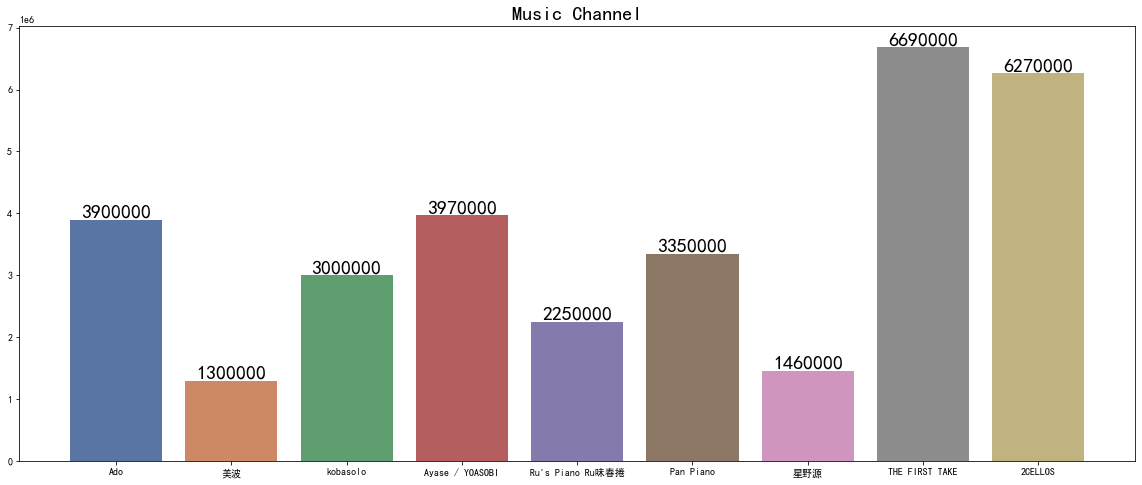

In [18]:
get_barplot(channel_data['Channel_name'], channel_data['Subscribers']) 

## 查看目前總觀看人數

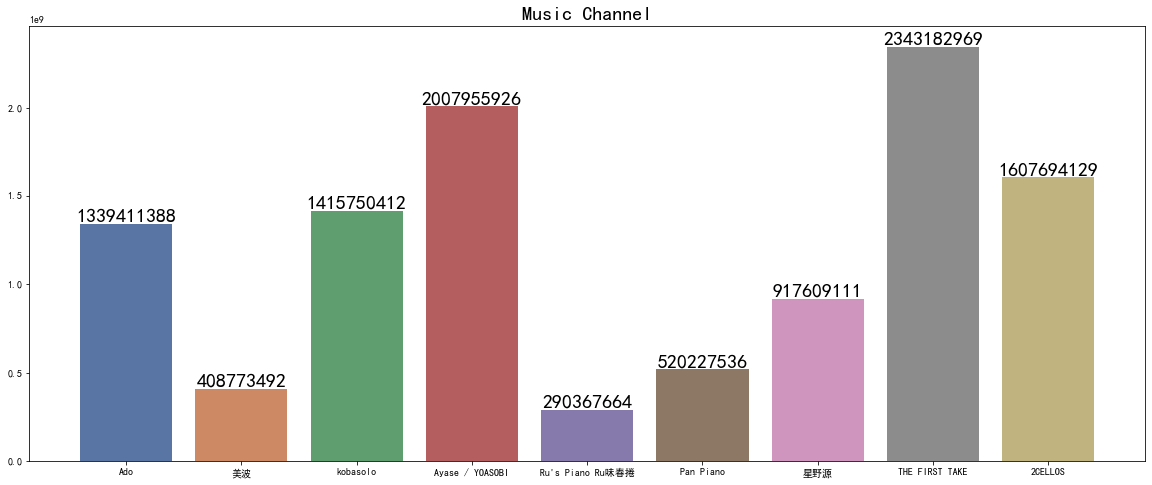

In [19]:
get_barplot(channel_data['Channel_name'], channel_data['Views'])

## 查看頻道上傳影片數量

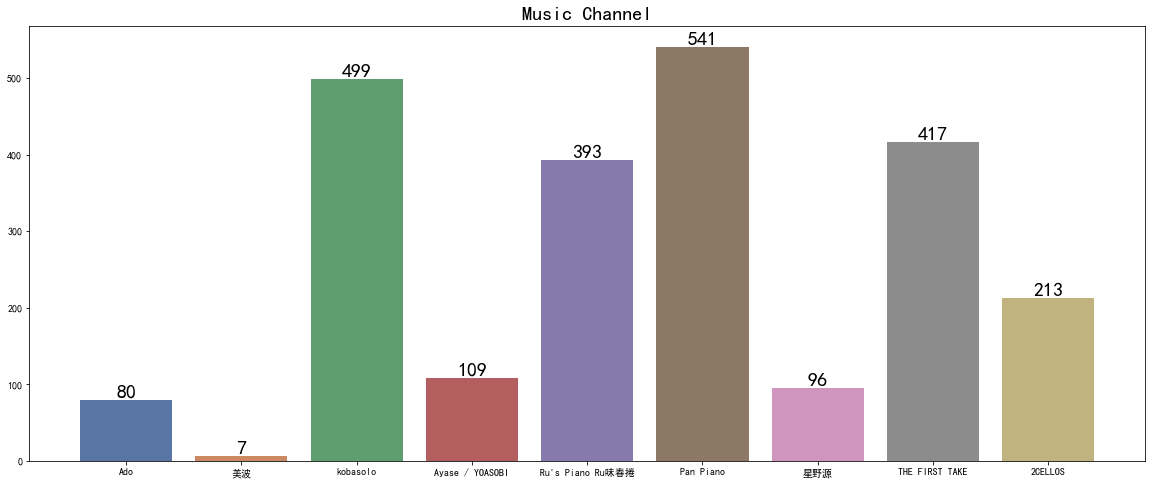

In [20]:
get_barplot(channel_data['Channel_name'], channel_data['VideoCount']) 